###### Generate the dataset:-
* like "make_regression" in sklearn same "make_classification" to make classification dataset

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)


In [2]:
import matplotlib.pyplot as plt

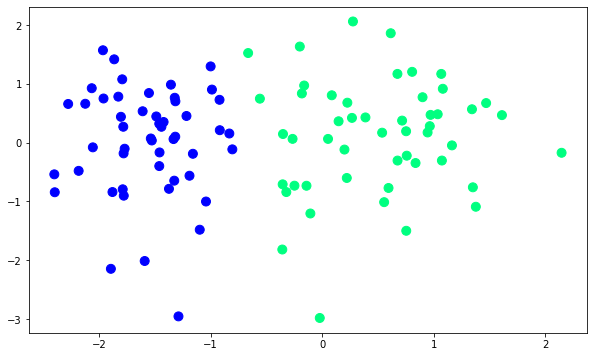

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap = 'winter',s = 80)

#####  Perceptron:-
* in perceptron we add new col. in starting with [1111]

In [57]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis =1)   # X data 0th row and 1 in the col
    weights = np.ones(X.shape[1])  # shape = 100,3 and it select 3 amd make w0,w1,w2 and w0 is intersept one
    lr  = 0.1
    
    for i in range(1000):    # run the loop thousand 1000 time 
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))   # step is activation function
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [58]:
def step(z):
    return 1 if z>0 else 0 

In [59]:
# weights[0] ---> c from Ax+By+c  intersept and 
# weights[1:]  ---> A,B,...  are the cofficient 

In [60]:
intercept_,coef_= perceptron(X,y)

In [61]:
print(coef_)
print(intercept_)

[1.36969249 0.20510624]
0.9


###  For understand the code line by line

In [21]:
np.insert(X,0,1,axis = 1)[:5]

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163]])

In [40]:
X.shape

(100, 2)

In [48]:
np.ones(3)  
# in case first one is "intersept"-->w0, and other 2 are w1,w2

array([1., 1., 1.])

In [44]:
X[45]

array([1.08059816, 0.91694693])

In [47]:
weight = np.ones(X.shape[1])
weight

array([1., 1.])

In [89]:
np.dot(X[45],weight)
# or                           both are same
#np.dot(X[45],[1,1,1])   # at present weight contain only 2 col element

1.997545086504941

In [51]:
# we use the thershold or "activation function"
#in case it is greater than 0 so it pass range 1 else 0 

###  ***********************************************

#### From this we can also find the "m" and "b"

In [92]:
m = -(coef_[0]/coef_[1])    
c = -(intercept_/coef_[1])

In [93]:
x_input = np.linspace(-3,3,100)   # b/w -3to 3 100 points
y_input = m*x_input + c

(-4.0, 2.0)

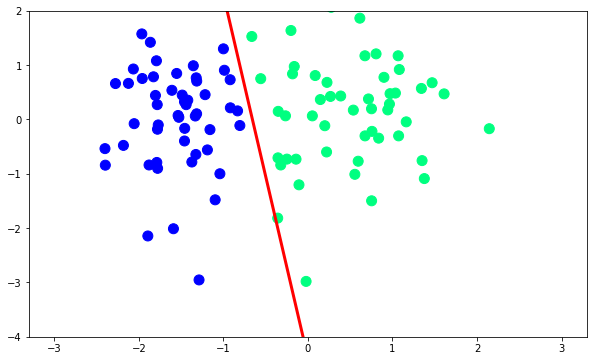

In [94]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,2)